# PROJECT: WRANGLING AND ANALYZE DATA



# Gathering

In [1]:
import pandas as pd
import numpy as np
import requests

import tweepy
from tweepy import OAuthHandler

import json
from timeit import default_timer as timer

WeRateDogs Twitter archive:

In [2]:
we_rate_dogs = pd.read_csv('twitter-archive-enhanced.csv')

The tweet image predictions data (programmatically downloaded):

In [3]:
#url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [4]:
image_p = pd.read_csv('image_predictions.tsv', sep='\t')

Additional data from the Twitter API: Accesing tweet data through Tweepy


api_key = 'api_key'
api_secret = 'api_secret'
access_token = 'access_token'
access_secret = 'access_secret'

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = we_rate_dogs['tweet_id'].values
len(tweet_ids)

Query Twitter's API for JSON data for each tweet ID in the Twitter archive

count = 0

fails_dict = {}

start = timer()

Save each tweet's returned JSON as a new line in a .txt file

with open('tweet_json.txt', 'w') as file:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, file)
            file.write('\n')
            
        except tweepy.errors.TweepyException as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
            
end = timer()
print(end - start)
print(fails_dict)

Reading data into a dataframe.

df_list= []
with open('tweet_json.txt', 'r') as file:
    for data in file:
        tweet = json.loads(data)
        tweet_date = tweet['created_at']
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df_list.append({'tweet_id': tweet_id, 
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})


df = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])
df.to_csv('tweet_data.csv', index=False)

In [5]:
tweet_data = pd.read_csv('tweet_data.csv')

# Assessing

In [6]:
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
image_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [9]:
we_rate_dogs[we_rate_dogs['text'].str.contains(pat= 'don\'t')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
47,883117836046086144,NaN,NaN,2017-07-07 00:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please only send dogs. We don't rate mechanics...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883117836...,13,10,None,None,None,None,None
59,880872448815771648,NaN,NaN,2017-06-30 19:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ugh not again. We only rate dogs. Please don't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880872448...,12,10,None,None,None,None,None
62,880095782870896641,NaN,NaN,2017-06-28 16:09:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in photos without dogs in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880095782...,11,10,None,None,None,None,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
96,873580283840344065,NaN,NaN,2017-06-10 16:39:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate Deck-bound Saskatoon Bla...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/873580283...,13,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,671768281401958400,NaN,NaN,2015-12-01 19:10:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you try to recreate the scene from Lady &...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671768281...,10,10,None,None,None,None,None
2087,670797304698376195,NaN,NaN,2015-11-29 02:51:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Trigger. He was minding his own busine...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670797304...,11,10,Trigger,None,None,None,None
2141,669993076832759809,NaN,NaN,2015-11-26 21:36:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. Her dreams of becoming a hippo b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669993076...,9,10,Zoey,None,None,None,None
2186,668981893510119424,NaN,NaN,2015-11-24 02:38:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Oddly shaped tail. Long pink ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668981893...,4,10,None,None,None,None,None


In [10]:
#Improving text output
pd.set_option('display.max_colwidth', 150)

In [11]:
we_rate_dogs['text'].sample(10)

1221                                                                              This is Blitz. He screams. 10/10 (vid by @yeaahliv) https://t.co/MfW2aym5UF
544     This is Major. He put on a tie for his first real walk. Only a little crooked. Can also drool upwards. H*ckin talented. 12/10 https://t.co/Zcwr8LgoO8
2288             These are strange dogs. All have toupees. Long neck for dogs. In a shed of sorts? Work in groups? 4/10 still petable https://t.co/PZxSarAfSN
1701                                                                                              This is Alice. She's an idiot. 4/10 https://t.co/VQXdwJfkyS
713                                                       This is Reginald. He's one magical puppo. Aerodynamic af. 12/10 would catch https://t.co/t0cEeRbcXJ
1046                                        Say hello to Bentley and Millie. They do everything together. Besties forever. Both 11/10 https://t.co/vU3tKr4vTn
33      Viewer discretion advised. This is Jimbo. He

In [12]:
we_rate_dogs.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [13]:
we_rate_dogs['source']

0       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
                                               ...                                        
2351    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2352    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2353    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2354    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2355    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>

In [14]:
we_rate_dogs['timestamp'].sample(5)

1736    2015-12-23 17:55:32 +0000
2302    2015-11-18 16:12:51 +0000
647     2016-10-31 17:00:11 +0000
2011    2015-12-03 02:45:32 +0000
862     2016-08-08 17:19:51 +0000
Name: timestamp, dtype: object

In [15]:
image_p.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
344,672267570918129665,https://pbs.twimg.com/media/CVRfyZxWUAAFIQR.jpg,1,Irish_terrier,0.716932,True,miniature_pinscher,0.051234,True,Airedale,0.044381,True
969,706516534877929472,https://pbs.twimg.com/media/Cc4NCQiXEAEx2eJ.jpg,1,golden_retriever,0.772685,True,Labrador_retriever,0.071665,True,golfcart,0.020993,False
368,672968025906282496,https://pbs.twimg.com/media/CVbc2V2WsAE3-kn.jpg,1,toy_poodle,0.678046,True,miniature_poodle,0.160273,True,Airedale,0.065649,True
1444,775733305207554048,https://pbs.twimg.com/media/CsP1UvaW8AExVSA.jpg,1,long-horned_beetle,0.613852,False,ox,0.029473,False,rhinoceros_beetle,0.027806,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
985,707610948723478529,https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg,1,golden_retriever,0.383223,True,cocker_spaniel,0.165930,True,Chesapeake_Bay_retriever,0.118199,True
933,703356393781329922,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,1,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True
461,674800520222154752,https://pbs.twimg.com/media/CV1ffl3XAAAiFyr.jpg,1,Pembroke,0.876479,True,Cardigan,0.096911,True,dingo,0.009196,False
1536,790581949425475584,https://pbs.twimg.com/media/Cvi2FiKWgAAif1u.jpg,2,refrigerator,0.998886,False,malinois,0.000153,True,kelpie,0.000131,True
857,696877980375769088,https://pbs.twimg.com/media/CavO0uuWEAE96Ed.jpg,1,space_heater,0.206876,False,spatula,0.123450,False,vacuum,0.119218,False


In [16]:
tweet_data.sample(5)

,tweet_id,retweet_count,favorite_count
1215,711968124745228288,2097,7429
1479,691675652215414786,461,1801
1804,676146341966438401,593,1755
316,832769181346996225,38,0
2263,667160273090932737,50,219


### Qualitative issues

 we_rate_dogs table:

    1. The retweet columns are not needed in the scope of the analysis.
    2. The reply columns are not needed in the scope of the analysis.
    3. Some data from the text column were not contents associated to an original tweet but a retweeted post.
    4. Incomplete or missing data
    5. The timestamp column datatype was ascribed an object.
    6. The dog breeds occupied multiple columns. 
    7. Some uploaded pictures were not that of a dog.
    8. The source column contains html tags which can be cleaned in other to access the values.
    
###    Tidiness issues

    1. There are multiple columns for dog stages.
    2. All three datasets are part of same observational unit.

### Copies of the orignal datasets 

In [17]:
ratings = we_rate_dogs.copy()

image = image_p.copy()

tdata = tweet_data.copy()

# Cleaning

## Tidiness

### All three dataset are part of the same observational unit

#### Define
Merge all tables together

#### Code

In [18]:
df3= ratings.join(image.set_index('tweet_id'), on='tweet_id')
tweet_df= df3.join(tdata.set_index('tweet_id'), on= 'tweet_id')

#### Test

In [19]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Multiple columns for dog stage

#### Define
Merge all dog stage (doggo, floofer, pupper, puppo) columns into one column

#### Code

In [20]:
dog_stages =[ 'doggo', 'floofer', 'pupper', 'puppo']

tweet_df[dog_stages] = tweet_df[dog_stages].replace('None', np.nan)

In [21]:
def join(x):
    return ', '.join(x.dropna().astype(str)) 

tweet_df['dog_stages'] = tweet_df[dog_stages].apply(join, axis=1)

In [22]:
tweet_df['dog_stages'] = tweet_df['dog_stages'].replace('', np.nan)

#### Test

In [23]:
tweet_df['dog_stages'].value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stages, dtype: int64

## Qualitative

### Multiple columns for dog breed

#### Define
Drop columns of dog stage ('doggo', 'floofer', 'pupper', 'puppo)

#### Code

In [24]:
tweet_df.drop(dog_stages, axis=1, inplace=True)

#### Test

In [25]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  jpg_url                     2075 

### The retweet columns are not needed in the scope of the analysis.

#### Define
Drop all the retweet associated column

#### Code

In [26]:
tweet_df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [27]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2356 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2356 non-null   object 
 4   source                 2356 non-null   object 
 5   text                   2356 non-null   object 
 6   expanded_urls          2297 non-null   object 
 7   rating_numerator       2356 non-null   int64  
 8   rating_denominator     2356 non-null   int64  
 9   name                   2356 non-null   object 
 10  jpg_url                2075 non-null   object 
 11  img_num                2075 non-null   float64
 12  p1                     2075 non-null   object 
 13  p1_conf                2075 non-null   float64
 14  p1_dog                 2075 non-null   object 
 15  p2  

## The reply columns are not  needed in the scope of the analysis.

#### Define
Drop all reply colum data.

#### Code

In [28]:
tweet_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

#### Test

In [29]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   int64  
 1   timestamp           2356 non-null   object 
 2   source              2356 non-null   object 
 3   text                2356 non-null   object 
 4   expanded_urls       2297 non-null   object 
 5   rating_numerator    2356 non-null   int64  
 6   rating_denominator  2356 non-null   int64  
 7   name                2356 non-null   object 
 8   jpg_url             2075 non-null   object 
 9   img_num             2075 non-null   float64
 10  p1                  2075 non-null   object 
 11  p1_conf             2075 non-null   float64
 12  p1_dog              2075 non-null   object 
 13  p2                  2075 non-null   object 
 14  p2_conf             2075 non-null   float64
 15  p2_dog              2075 non-null   object 
 16  p3    

### The timestamp column datatype was ascribed an object.

#### Define
Convert the datatype from object to datetime.

#### Code

In [30]:
tweet_df['timestamp'] = pd.to_datetime(ratings['timestamp'])

#### Test

In [31]:
tweet_df['timestamp'].sample(5)

904    2016-07-27 17:35:10+00:00
1360   2016-02-26 17:20:56+00:00
2056   2015-11-30 15:59:17+00:00
660    2016-10-26 16:14:55+00:00
1282   2016-03-12 19:35:15+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

###  Some rows were without records.

#### Define
Drop missing values from the "expanded_urls" column

#### Code

In [32]:
tweet_df.dropna(inplace=True)

#### Test

In [33]:
tweet_df.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
jpg_url               0
img_num               0
p1                    0
p1_conf               0
p1_dog                0
p2                    0
p2_conf               0
p2_dog                0
p3                    0
p3_conf               0
p3_dog                0
retweet_count         0
favorite_count        0
dog_stages            0
dtype: int64

### The source column contains html tags which can be cleaned inorder to access the values.

#### Define
Extract the values from within the anchor tags

#### Code

In [34]:
tweet_df['source'] = tweet_df['source'].str.extract(r'^<a.+>(.+)</a>$')

#### Test

In [35]:
tweet_df['source'].sample(5)

631     Twitter for iPhone
973     Twitter for iPhone
1738    Twitter for iPhone
1606    Twitter for iPhone
527     Twitter for iPhone
Name: source, dtype: object

### Some data from the text column were not contents associated to an original tweet but a retweeted post.


#### Define
Drop all "RT" text-asociated data

#### Code

In [36]:
indx= tweet_df[tweet_df['text'].str.contains(pat = 'RT')].index
tweet_df.drop(index= indx, inplace=True)

#### Test

In [37]:
tweet_df['text'].str.contains(pat = 'RT').sum()


0

### Some uploaded pictures were not that of a dog.


#### Define
Drop uploads that were not associated with dogs

#### Code

In [38]:
indx2 =tweet_df[tweet_df['text'].str.contains(pat= 'don\'t')].index
tweet_df.drop(index =indx2, inplace=True)

#### Test

In [39]:
tweet_df[tweet_df['text'].str.contains(pat= 'don\'t')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stages


# Storing Data

In [40]:
#Saved data to file path
tweet_df.to_csv('twitter_archive_master.csv')

# Analyzing and Visualizing Data

#### Insights
1. What gadgets were used to send tweets?
2. Which of the dog breeds were more ?
3. What was the rate of response to the poll between 2015 and 2017?


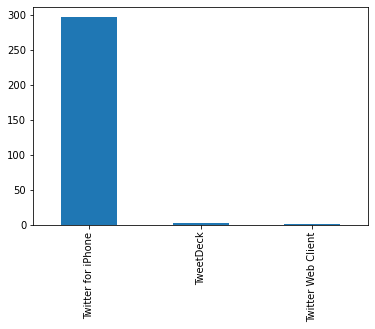

In [41]:
tweet_df['source'].value_counts().plot(kind='bar');

A plot of tweets against its sources